In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:/pythonproject/Data_training_and_val_set_CNvsAD.csv')

In [3]:
# check the dataset

df.head()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,1063,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,184,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,16,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,575,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,403,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0


In [4]:
# check the shape of the dataset

no_samples = df.shape[0]
no_cols = df.shape[1]

print("Number of samples = ", no_samples)
print("Number of features = ", no_cols)

Number of samples =  220
Number of features =  17


In [5]:
# check the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         220 non-null    int64  
 1   BRAIN       220 non-null    int64  
 2   EICV        220 non-null    int64  
 3   VENTRICLES  220 non-null    float64
 4   LHIPPOC     220 non-null    float64
 5   RHIPPOC     220 non-null    float64
 6   LINFLATVEN  220 non-null    float64
 7   RINFLATVEN  220 non-null    float64
 8   LMIDTEMP    220 non-null    float64
 9   RMIDTEMP    220 non-null    float64
 10  LINFTEMP    220 non-null    float64
 11  RINFTEMP    220 non-null    float64
 12  LFUSIFORM   220 non-null    float64
 13  RFUSIFORM   220 non-null    float64
 14  LENTORHIN   220 non-null    float64
 15  RENTORHIN   220 non-null    float64
 16  DXCURREN    220 non-null    int64  
dtypes: float64(13), int64(4)
memory usage: 29.3 KB


EDA

In [6]:
# obtain the most correlated features from the dataset

cols = [col for col in df.columns[1:-1]] # exclude the individual identifier and diagnostic status from the columns
corr_feat = df[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
corr_feat.head(10)

BRAIN       BRAIN         1.000000
            EICV          0.914554
LHIPPOC     RHIPPOC       0.882356
RMIDTEMP    RINFTEMP      0.874190
LINFTEMP    LMIDTEMP      0.871690
LINFLATVEN  RINFLATVEN    0.851397
LINFTEMP    LFUSIFORM     0.849473
RFUSIFORM   RINFTEMP      0.821934
LMIDTEMP    LFUSIFORM     0.803698
RMIDTEMP    RFUSIFORM     0.791022
dtype: float64

Text(0.5, 1.0, 'RMIDTEMP vs RINFLATVEN')

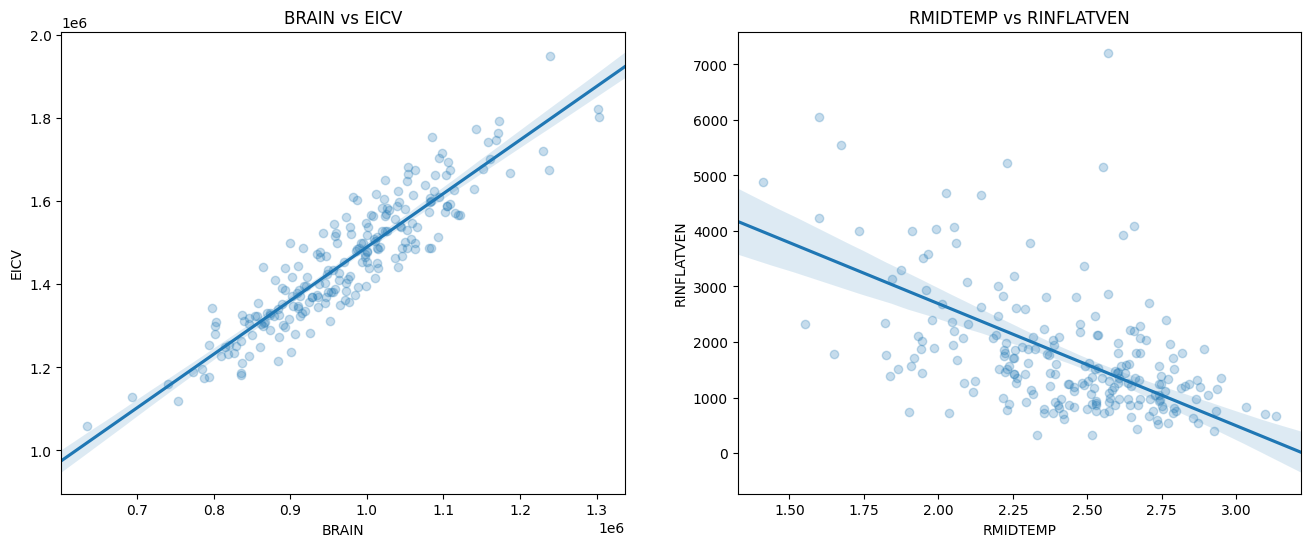

In [7]:
# set figure for the plots
plt.figure(figsize=[16, 6])

plt.subplot(1,2,1) # first plot... BRAIN vs EICV
sns.regplot(data = df, x = 'BRAIN', y = 'EICV',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('BRAIN vs EICV')

plt.subplot(1,2,2) # second plot... RMIDTEMP vs RINFLATVEN
sns.regplot(data = df, x = 'RMIDTEMP', y = 'RINFLATVEN',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('RMIDTEMP vs RINFLATVEN')

In [8]:
# check the number of subjects in the two groups

df['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

In [9]:
# divide the data into two... for each group of the subjects

demented = df[df.DXCURREN == 1]
normal = df[df.DXCURREN == 0]

In [10]:
normal.describe()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,110.000000,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,618.381818,9.963349e+05,1.458788e+06,38110.280545,3533.095727,3678.580818,1234.750545,1244.294327,2.564385,2.598034,2.620976,2.588706,2.389659,2.365876,3.186655,3.298458,0.0
std,375.369347,1.008995e+05,1.385857e+05,19498.516050,437.641108,485.292154,600.430303,582.330046,0.164993,0.175526,0.165534,0.185919,0.168340,0.179007,0.359900,0.380936,0.0
min,14.000000,6.345910e+05,1.059560e+06,7552.460000,2610.820000,2276.750000,296.264000,318.735000,2.144620,2.034030,2.217610,2.073350,1.944840,1.951850,2.102060,1.914300,0.0
25%,356.250000,9.349688e+05,1.369175e+06,23096.675000,3253.775000,3387.677500,838.165250,857.978250,2.446850,2.479728,2.497962,2.465785,2.292543,2.246135,2.997032,3.141375,0.0
50%,591.500000,9.915630e+05,1.458785e+06,35090.050000,3494.130000,3739.525000,1198.935000,1166.515000,2.576560,2.590250,2.616785,2.605465,2.388425,2.356490,3.240530,3.352955,0.0
75%,893.500000,1.056188e+06,1.562318e+06,48850.825000,3775.557500,3913.955000,1505.482500,1506.007500,2.683677,2.722417,2.746993,2.708745,2.502875,2.479872,3.415535,3.522813,0.0
max,1288.000000,1.301340e+06,1.823070e+06,118808.000000,5514.940000,5750.400000,4551.830000,4081.390000,2.949880,3.010460,3.048830,3.141290,2.817160,2.770310,3.760310,4.075010,0.0


In [11]:
# obtain the mean of each feature in both group

demented_mean = demented[cols].describe().loc['mean']
demented_mean

BRAIN         9.501246e+05
EICV          1.451390e+06
VENTRICLES    5.552915e+04
LHIPPOC       2.762603e+03
RHIPPOC       2.952135e+03
LINFLATVEN    2.249683e+03
RINFLATVEN    2.253310e+03
LMIDTEMP      2.218401e+00
RMIDTEMP      2.258468e+00
LINFTEMP      2.285647e+00
RINFTEMP      2.290316e+00
LFUSIFORM     2.099536e+00
RFUSIFORM     2.104474e+00
LENTORHIN     2.499836e+00
RENTORHIN     2.589077e+00
Name: mean, dtype: float64

In [12]:
normal_mean = normal[cols].describe().loc['mean']
normal_mean

BRAIN         9.963349e+05
EICV          1.458788e+06
VENTRICLES    3.811028e+04
LHIPPOC       3.533096e+03
RHIPPOC       3.678581e+03
LINFLATVEN    1.234751e+03
RINFLATVEN    1.244294e+03
LMIDTEMP      2.564385e+00
RMIDTEMP      2.598034e+00
LINFTEMP      2.620976e+00
RINFTEMP      2.588706e+00
LFUSIFORM     2.389659e+00
RFUSIFORM     2.365876e+00
LENTORHIN     3.186655e+00
RENTORHIN     3.298458e+00
Name: mean, dtype: float64

In [13]:
# perform two sample T-test to determine features that are significantly different between the two groups
 
# Import the library
import scipy.stats as stats

a = df[df["DXCURREN"]==0][cols]
b = df[df["DXCURREN"]==1][cols]

pvalue = pd.DataFrame(stats.ttest_ind(a=a, b=b)).T[1]
pvalue

0     1.464905e-03
1     7.209300e-01
2     1.444776e-07
3     3.110688e-24
4     6.790456e-20
5     7.197735e-15
6     7.144266e-13
7     5.668557e-25
8     2.069136e-25
9     1.167292e-26
10    2.104613e-19
11    3.829996e-20
12    9.731913e-18
13    3.026538e-27
14    9.028144e-25
Name: 1, dtype: float64

In [14]:
# create a dataframe of the mean differences of the features for the two groups and the p-values

mean_diff = pd.DataFrame()
mean_diff["features"] = cols
mean_diff["demented"] = list(demented_mean)
mean_diff["normal"] = list(normal_mean)
mean_diff["mean difference"] = mean_diff["demented"] - mean_diff["normal"]
mean_diff["p-values"] = list(pvalue)
mean_diff = mean_diff.sort_values("p-values", ascending=True) #sort the p-values from the lowest to highest
mean_diff

,features,demented,normal,mean difference,p-values
13,LENTORHIN,2.499836e+00,3.186655e+00,-0.686819,3.026538e-27
9,LINFTEMP,2.285647e+00,2.620976e+00,-0.335329,1.167292e-26
8,RMIDTEMP,2.258468e+00,2.598034e+00,-0.339566,2.069136e-25
7,LMIDTEMP,2.218401e+00,2.564385e+00,-0.345984,5.668557e-25
14,RENTORHIN,2.589077e+00,3.298458e+00,-0.709381,9.028144e-25
3,LHIPPOC,2.762603e+03,3.533096e+03,-770.493091,3.110688e-24
11,LFUSIFORM,2.099536e+00,2.389659e+00,-0.290123,3.829996e-20
4,RHIPPOC,2.952135e+03,3.678581e+03,-726.445727,6.790456e-20
10,RINFTEMP,2.290316e+00,2.588706e+00,-0.298390,2.104613e-19
12,RFUSIFORM,2.104474e+00,2.365876e+00,-0.261402,9.731913e-18


In [15]:
# obtain the significant features... these are features with p-values less than 0.05

sig_features = mean_diff[mean_diff["p-values"] <= 0.05]["features"]
sig_features

13     LENTORHIN
9       LINFTEMP
8       RMIDTEMP
7       LMIDTEMP
14     RENTORHIN
3        LHIPPOC
11     LFUSIFORM
4        RHIPPOC
10      RINFTEMP
12     RFUSIFORM
5     LINFLATVEN
6     RINFLATVEN
2     VENTRICLES
0          BRAIN
Name: features, dtype: object

In [16]:
#dropping irrelevant feature
df.drop(['RID'], axis=1, inplace = True)

In [17]:
input_cols = [col for col in df.columns[:-1]] # select the input columns

X = df[input_cols] # input data
y = df['DXCURREN'] # target

Train-Test Split

In [18]:
# splitting dataset into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1502)

In [19]:
# check the training and validation data shape

print(X_train.shape)
print(X_val.shape)

(176, 15)
(44, 15)


Feature Scaling

In [20]:
#import Standard Scaler library for feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # create an instance of the scaler
train = sc.fit_transform(X_train) # fit the scaler on the training set
train_input = pd.DataFrame(train, columns=input_cols) # convert the scaled data array into dataframe


val = sc.transform(X_val) # transform the scaler on the validation set
val_input = pd.DataFrame(val, columns=input_cols)

train_input.head()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN
0,-1.227429,-1.719492,-1.276582,-1.624370,-1.504304,-0.927879,-0.998002,0.335329,0.402690,0.546397,0.358726,0.354751,0.338053,0.207960,-0.551666
1,-0.657417,-0.884919,-1.135555,-0.317311,0.158075,-0.893590,-1.066524,0.265196,0.423022,-0.020961,0.703107,1.079810,-0.073659,0.880774,0.646012
2,1.173813,1.341337,0.600113,1.695104,1.213179,-0.271619,0.109779,0.990124,0.776955,0.467556,0.054374,0.586219,0.326308,1.266824,0.690490
3,-0.147370,-0.135645,1.763647,-1.549985,-1.311007,4.517292,5.374835,-0.304644,-0.321799,-0.132560,0.092467,-0.620812,-0.168634,-1.578718,-0.589162
4,-0.835118,-0.842173,-0.105676,-0.478562,-0.635741,-0.423111,-0.464421,0.992470,0.104976,1.341099,0.493652,1.705810,1.670023,-0.601500,-0.442291


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)  

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

Training(Random Forest)

In [23]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.83      0.89      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



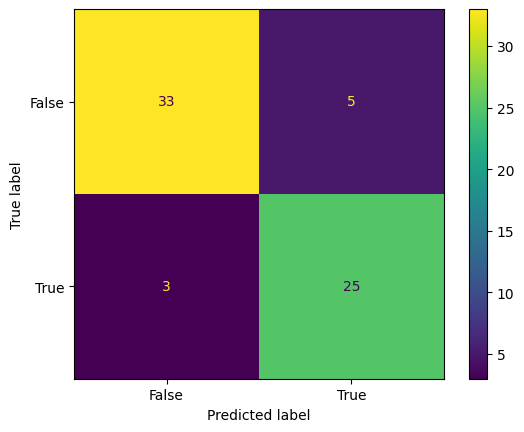

In [24]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [25]:
Accuracy = metrics.accuracy_score(y_test, y_pred6)
print(Accuracy)

0.8787878787878788


In [26]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already trained and evaluated your model and obtained the predicted labels (y_pred6) and true labels (y_test)

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred6)
recall = metrics.recall_score(y_test, y_pred6)
f1_score = metrics.f1_score(y_test, y_pred6)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Calculate the probability scores for the positive class
y_scores = model6.predict_proba(x_test)[:, 1]

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = metrics.roc_auc_score(y_test, y_scores)

print("AUC-ROC:", auc_roc)


Precision: 0.8333333333333334
Recall: 0.8928571428571429
F1-Score: 0.8620689655172413
AUC-ROC: 0.943609022556391


In [27]:
model6

RandomForestClassifier(random_state=1)

In [28]:
import numpy as np
print(np.__version__)

1.24.0


In [30]:
df.head()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0


In [31]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

# shap Local Interpetability

In [32]:
model6

RandomForestClassifier(random_state=1)

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20,random_state = 1502)

model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=1502)

In [34]:
import shap
explainer = shap.KernelExplainer(model.predict,x_test)

c:\Users\sneha.kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\sneha.kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

In [35]:
# Convert x_test array to DataFrame with feature names
x_test_df = pd.DataFrame(x_test, columns=x_train.columns)

# Get predictions
y_pred = model.predict(x_test)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test_df)

# Summarize the effects of all features
shap.summary_plot(shap_values, x_test_df)

# Calculate and print mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.


AttributeError: module 'numpy' has no attribute 'bool'

In [ ]:
x_test.head()

In [36]:
#local interpretability
instance = x_test.loc[[105]]
shap_instance = explainer.shap_values(instance)
shap.initjs()
shap.force_plot(explainer.expected_value,shap_instance,instance)

In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.


AttributeError: module 'numpy' has no attribute 'bool'

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split your data into x_train, x_test, y_train, y_test

# Train the random forest model
model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)

# Convert x_test array to DataFrame with feature names
x_test_df = pd.DataFrame(x_test, columns=x_train.columns)

# Get predictions
y_pred6 = model6.predict(x_test)

# Compute SHAP values
explainer = shap.KernelExplainer(model6.predict, x_train)
shap_values = explainer.shap_values(x_test_df)

# Summarize the effects of all features
shap.summary_plot(shap_values, x_test_df)

# Print classification report
print(classification_report(y_test, y_pred6))
